In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.model_selection import train_test_split

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                test_size = 0.2,
                                                random_state = 1212)
(X_train,y_train)
X_train = X_train.astype('float32'); X_val= X_val.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_val /= 255; X_test /= 255

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Training data shape: ', X_val.shape)
print('Training labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (48000, 28, 28)
Training labels shape:  (48000,)
Training data shape:  (12000, 28, 28)
Training labels shape:  (12000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


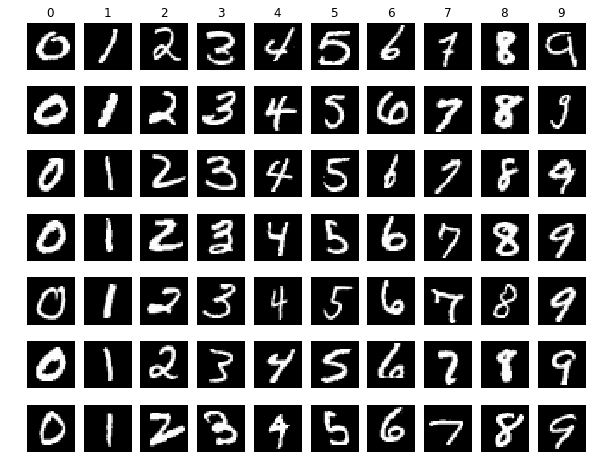

In [22]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [23]:
nsamples, nx, ny = X_train.shape
X_train1 = X_train.reshape((nsamples,nx*ny))
nsamples_val, nx_val, ny_val = X_val.shape
X_val1 = X_val.reshape((nsamples_val,nx_val*ny_val))
y_train1 = keras.utils.to_categorical(y_train, num_classes)
y_val1 = keras.utils.to_categorical(y_val, num_classes)
print(y_train1[5])
print((min(X_train1[1]), max(X_train1[1])))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(0.0, 1.0)


In [24]:
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_classes, activation='softmax', name = "Output_Layer")(x)
model = Model(Inp, output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
_____________________________________________________

In [34]:
learning_rate = 0.15
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [35]:
history1 = model.fit(X_train1, y_train1,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_val1, y_val1))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9789
Epoch 2/20
 - 1s - loss: 9.9372e-04 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9791
Epoch 3/20
 - 1s - loss: 9.7593e-04 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9795
Epoch 4/20
 - 1s - loss: 9.6526e-04 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9793
Epoch 5/20
 - 1s - loss: 9.4949e-04 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9793
Epoch 6/20
 - 1s - loss: 9.3952e-04 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9794
Epoch 7/20
 - 1s - loss: 9.2364e-04 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9790
Epoch 8/20
 - 1s - loss: 9.0486e-04 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9792
Epoch 9/20
 - 1s - loss: 8.9624e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9790
Epoch 10/20
 - 1s - loss: 8.8367e-04 - accuracy: 1.0000 - val_loss: 0.0945 - val_

In [37]:
y_pred = model.predict(X_test1)
print(y_pred)
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 4 5 6]


In [38]:
score = model.score(dX_test1, y_test1)
print("accuracy=%.2f%%" % (score * 100))

AttributeError: 'Model' object has no attribute 'score'